## Read data

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_parquet('../data/sales-7036861.parquet.gzip')
df

,BILL_DATE,MATERIAL,SALES_DIST,SOLD_TO,SHIP_TO,PIEZAS
56436972,2019-11-03,12091,104862,6001773,7036861,1
56436973,2019-11-03,17568,104862,6001773,7036861,1
56436974,2019-11-03,15439,104862,6001773,7036861,1
56436975,2019-11-03,542,104862,6001773,7036861,1
56436976,2019-11-03,2674,104862,6001773,7036861,1
...,...,...,...,...,...,...
187373097,2021-03-31,2296,104862,6003121,7036861,1
187373098,2021-03-31,3590,104862,6003121,7036861,1
187373099,2021-03-31,8505,104862,6003121,7036861,1
187373100,2021-03-31,16951,104862,6003121,7036861,1


## Get top products by sales

In [85]:
relevant_info_df = df[["MATERIAL","BILL_DATE","PIEZAS"]]
# Group by sales
by_sales = relevant_info_df.groupby('MATERIAL').PIEZAS.sum().to_frame(name = 'PIEZAS').reset_index()
by_sales = by_sales.sort_values(by=['PIEZAS'],ascending=False)

top_10 = by_sales.head(10)
top_10

,MATERIAL,PIEZAS
899,42830,191
951,42915,179
950,42914,162
926,42883,141
919,42875,126
941,42902,125
1031,43337,116
903,42847,113
902,42846,98
984,42957,94


## Get data from most sold product

In [86]:
prod_1 = relevant_info_df[relevant_info_df["MATERIAL"] == top_10.iloc[0]["MATERIAL"]]
prod_1 = prod_1.groupby('BILL_DATE').PIEZAS.sum().to_frame(name = 'PIEZAS')

idx = pd.date_range('2019-03-03', '2021-03-31')
prod_1.index = pd.DatetimeIndex(prod_1.index)
prod_1 = prod_1.reindex(idx, fill_value=0)
prod_1.index.name = "BILL_DATE"
prod_1 = prod_1.reset_index()

print(prod_1)

     BILL_DATE  PIEZAS
0   2019-03-03       0
1   2019-03-04       0
2   2019-03-05       0
3   2019-03-06       0
4   2019-03-07       0
..         ...     ...
755 2021-03-27       0
756 2021-03-28       0
757 2021-03-29       0
758 2021-03-30       0
759 2021-03-31       0

[760 rows x 2 columns]


## Plot top product behaviour

<AxesSubplot:>

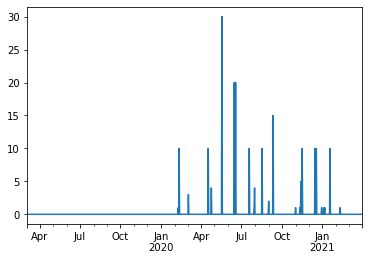

In [87]:
p1_x = prod_1["BILL_DATE"].to_numpy()
p1_y = prod_1["PIEZAS"].to_numpy()
ts = pd.Series(p1_y, index=p1_x)
ts.cumsum()
ts.plot()
